In [75]:
# Imports and Settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [76]:
df = pd.read_csv("./data/tvmarketing.csv")
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


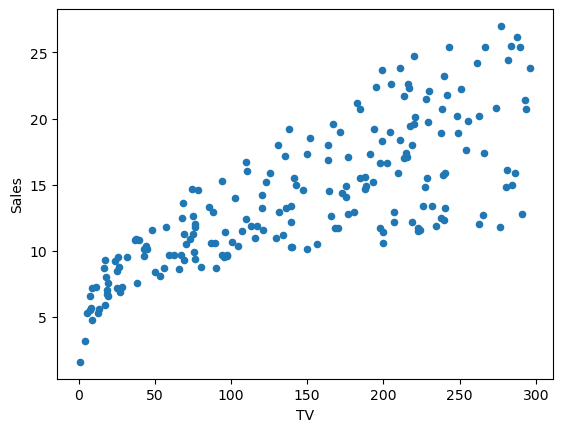

In [77]:
df.plot(kind="scatter", x="TV", y="Sales");

**Key Finding:** It looks like we have a linear relationship between TV Advertisement expenses and our sales.

In [78]:
m = 0
b = 0
alpha = 0.1
epochs = 10000

X = np.array(df["TV"])
y = np.array(df["Sales"])

# Normalize the X data
X_norm = (X - X.min()) / (X.max() - X.min())

In [79]:
cost_history = []

for i in range(epochs):
    preds = m * X_norm + b
    error = preds - y
    mse = np.mean(error**2)
    cost_history.append(mse)
    
    D_m = np.mean(error * X_norm)
    D_b = np.mean(error)
    
    m = m - alpha * D_m
    b = b - alpha * D_b

print(cost_history[0]) # 141.22    
print(cost_history[-1]) # 113.21


223.71625
10.512652915656757


<Axes: >

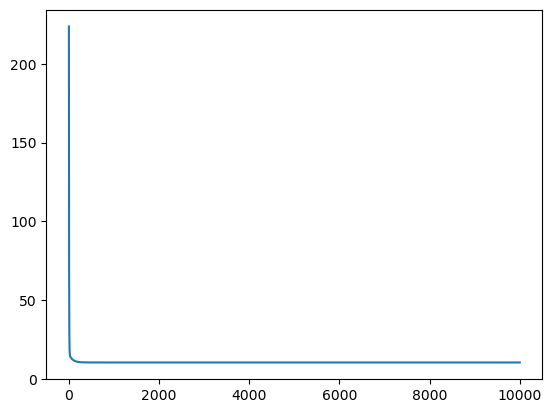

In [80]:
sns.lineplot(cost_history)

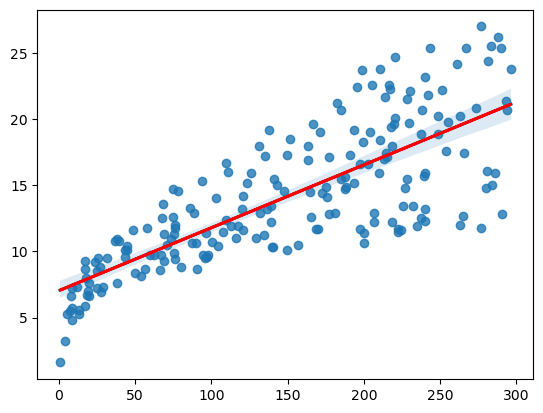

In [82]:
# Seaborn calculates and draws the best-fit line automatically
sns.regplot(x=X, y=y)
# On the same plot, draw our line
plt.plot(X, preds, color='red', linewidth=2)